Para la realización del Adaline y del Batch Gradiente Descendente se realizo los siguientes pasos.

1. Se instalo las librerias necesarias para el entorno de Google colab, despues se importo las librerias.

In [1]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn


In [2]:
from sklearn import datasets


2. para la clase Adeline se completo el código faltante del metódo fit, siguiendo el siguiente algoritmo:  
## Algoritmo de entrenamiento:
    1.   Inicializar los pesos
    2.   Calcular la entrada a la neurona
    3.   Calcular la salida con la función de activación
    4.   Actualizar los pesos
    5.   Repetir los pasos 2 al 4 hasta que las salidas reales y las deseables sean iguales para todos los vectores del conjunto de entrenamiento
    


Para el método net_input se calculo la entrada a la neurona, multiplicando X con los pesos y sumando el bias.

In [15]:
class AdalineGD(object):
    """ADAptative LInear NEuron classifier

    Parameters
    ----------
    eta : float
        Learning rate between 0.0 and 1.0
    n_iter : int
        Passes over the trainning dataset
    random_state : int
        Random number generatos seed for random weight initialization.

    Attributes
    ----------

    w_ : 1d-array
        Weights after fitting
    cost_ : list
        Sum-of-squares cost function value in each epoch.

    """


    def __init__ (self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state


    def fit(self, X, y):
        """ Fit data.

        Parameters
        ----------
        X: {array-like}, shape = [n_examples, n_features]
            Trainning vectors, where n_examples
            is the number of examples and
            n_features is the number of features.
        y : arra-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self : object

        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X) # calculando la entrada de la red
            output = self.activation(net_input) # aplicando la función de activación
            errors = y - output # calculando los errores
            self.w_[1:] += self.eta * X.T.dot(errors) # actualizando los pesos
            self.w_[0] += self.eta * errors.sum() # actualizando el bias
            cost = (errors**2).sum() / 2.0 # calculo del costo
            self.cost_.append(cost) # se añade el costo a la lista para despues graficar
        return self

    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]



    def activation(self, X):
        """ Compute linear activation"""
        return X


    def predict(self, X):
        """ Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

3. Se cargan los datos de la libreria de scikit-learn y se realiza la graficación de los datos.



<function matplotlib.pyplot.show(close=None, block=None)>

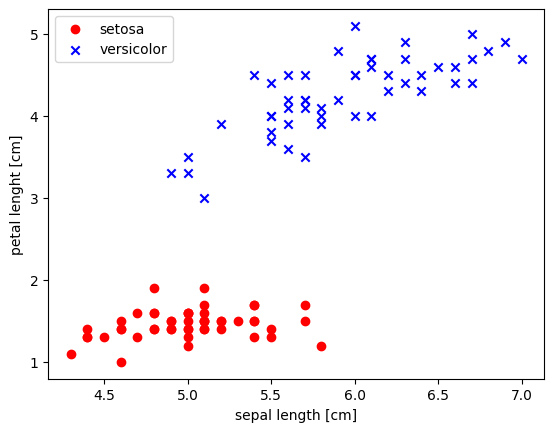

In [16]:

# Datos del conjunto Iris
iris = datasets.load_iris()
X = iris.data
Y = iris.target


# Select setosa and versicolor
y = Y[:100]
y[:50] =-1
y[50:100] = 1
X =X[0:100,[0,2]]

#plot data
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')
plt.show


In [17]:
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)

4. Se realiza las graficas de los datos de los errores obtenidos al entrenar dos Adaline con distintos factores de aprendizaje para comprobar su error de aprendizaje entre ambos.

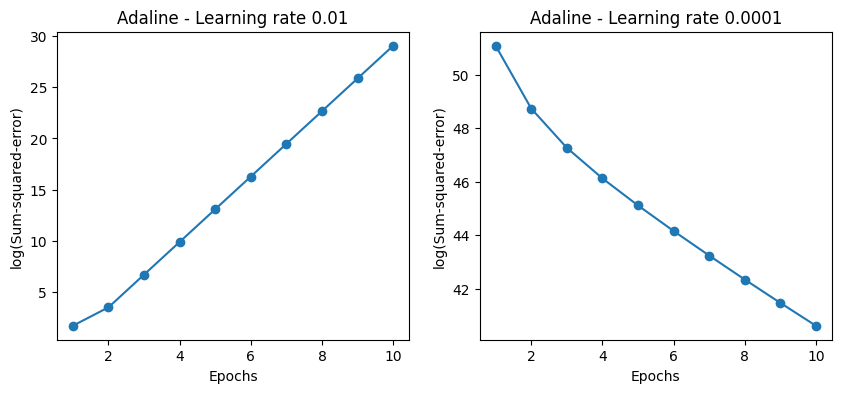

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].plot (range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker= 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)
ax[1].plot (range(1, len(ada2.cost_) + 1), ada2.cost_, marker= 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

5. Otra forma de mejorar este modelo es normalizando los datos para que estos se encuentren dentro del mismo rango, esto se realiza en el siguiente código.

In [19]:
#Normalización de los datos
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(n_iter = 15, eta = 0.01)
ada_gd.fit(X_std, y)


6. Graficación de los datos de la linea de desicion del modelo adaline asi como del calculo de los errores.

In [20]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],label=cl, edgecolor='black')

<ipython-input-20-6e0775d89af9>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],label=cl, edgecolor='black')


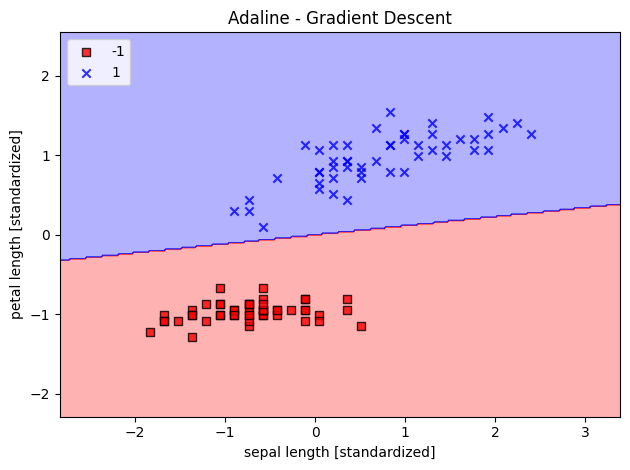

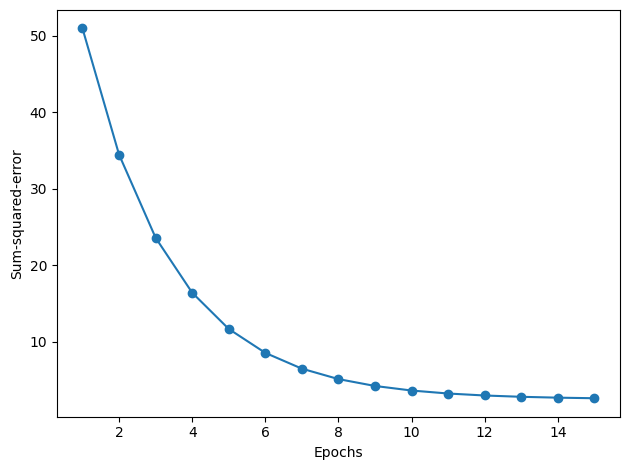

In [21]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()